In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* Questão 1
    * Letra A : importe o dataset police.csv, e indique quantas variáveis estão disponíveis e quantos
registros policiais estão catalogados;

In [2]:
police = pd.read_csv('police.csv')
police.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [3]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

Nós temos 15 variáveis no conjunto de dados Police.csv e 91741 registros catalogados.
A título de informação, podemos utilizar também o comando police.shape para vermos a quantidade de entradas e variáveis.
a saida seria:
(91741, 15)

* Questão 1
    (b) Conte o número de dados faltosos de cada variável;

In [4]:
#verificando se police é vazio.
police.isnull()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91737,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91738,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91739,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


In [5]:
#Vendo quantos valores "nan" temos em cada variável.
print(police.isnull().sum())

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


* Questão 1
    (c) Como estamos trabalhando somente com dados de um único estado, não faz sentido
mantermos informações de variáveis como county_name e state. Exclua essas variáveis
do conjunto;

In [6]:
#excluindo as variáveis county_name e state.
police.drop('county_name',axis=1,inplace=True)

In [7]:
#excluindo as variáveis county_name e state.
police.drop('state',axis=1,inplace=True)

In [8]:
police.shape

(91741, 13)

* Questão 1
    (d) Durante as análises, a coluna driver_gender será crítica para muitas de suas análises.
    Como apenas uma pequena fração das linhas está faltando driver_gender, remova
    essas linhas do conjunto de dados;

In [9]:
print(police[['driver_gender']])

      driver_gender
0                 M
1                 M
2                 M
3                 M
4                 F
...             ...
91736             F
91737             F
91738             M
91739             F
91740             M

[91741 rows x 1 columns]


In [10]:
print(police['driver_gender'].isnull().sum())


5205


In [11]:
police['driver_gender'].replace('',np.nan,inplace=True)

In [12]:
police.dropna(subset=['driver_gender'],inplace=True)

In [13]:
#removendo as linhas vazias ou valores nans.
print(police['driver_gender'].isnull().sum())

0


* QUESTÃO 1 
    (e) Vá na descrição dos dados e verifique que tipo de variável são search_conducted,
is_arrested e district; depois compare com os tipos de dados que estão armazena-
dos no conjunto de dados. Havendo necessidade, faça a modificação dos tipos de dados
para essas variáveis

In [14]:
print(police.dtypes)

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object


Não é necessário mudar o tipo de nenhuma variável.

* Questão 1
    (f) A data e a hora de cada parada de tráfego estão armazenadas em colunas separadas:
    stop_date e stop_time. Combine essas duas colunas em uma única coluna, nomeando-
    a como stop_datetime e converta no formato data e hora (tipo datetime). Isso habi-
    litará atributos baseados em data convenientes que usaremos posteriormente no projeto;

In [15]:
police["stop_datetime"] = police["stop_date"] + police["stop_time"]

In [16]:
pd.to_datetime(police['stop_date'] + ' ' + police['stop_time'], errors='ignore')

0       2005-01-04 12:55:00
1       2005-01-23 23:15:00
2       2005-02-17 04:15:00
3       2005-02-20 17:15:00
4       2005-02-24 01:20:00
                ...        
91736   2015-12-31 21:21:00
91737   2015-12-31 21:59:00
91738   2015-12-31 22:04:00
91739   2015-12-31 22:09:00
91740   2015-12-31 22:47:00
Length: 86536, dtype: datetime64[ns]

In [17]:
police.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_datetime
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-0412:55
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-2323:15
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-1704:15
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-2017:15
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-2401:20


* QUESTÃO 1
    (g) Por fim, transforme a coluna stop_datetime no índice do dataframe.

In [18]:
police = police.set_index('stop_datetime')

In [19]:
police.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-0412:55,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-2323:15,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-1704:15,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-2017:15,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-2401:20,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


*QUESTÃO 2
    a) Antes de comparar as infrações cometidas por cada gênero, você deve examinar as infra-
ções cometidas por todos os motoristas para obter uma compreensão básica dos dados.
Construa uma distribuição de frequências da variável violation e responda: qual a
infração mais comum e a menos notificada?

In [20]:
freqviolation = police["violation"].value_counts(normalize=True)*100

freq_violation = {"Frequência Absoluta": police["violation"].value_counts(), 
       "Frequência Relativa %": police["violation"].value_counts(normalize=True)*100,
            "Frequência Cumulativa": np.cumsum(police["violation"].value_counts())}
freqv = pd.DataFrame(freq_violation)
freqv

,Frequência Absoluta,Frequência Relativa %,Frequência Cumulativa
Speeding,48423,55.957058,48423
Moving violation,16224,18.748267,64647
Equipment,10921,12.620181,75568
Other,4409,5.094989,79977
Registration/plates,3703,4.279144,83680
Seat belt,2856,3.300361,86536


Podemos ver que a infração mais comum é de velocidade, com mais de 55% do total(48423). A menos notificada é: 'seat belt', cinto de segurança com 2856.

*QUESTÃO 2
    (b) O interesse agora é responder a seguinte questão: motoristas do sexo masculino e femi-
nino tendem a cometer diferentes tipos de infrações de trânsito? Para isso, crie uma tabela
de contingência para frequência absoluta e outra para frequência relativa, contendo a
distribuição conjunta das variáveis driver_gender e violation.

In [21]:
freqgender = police["driver_gender"].value_counts(normalize=True)*100

freq_gender = {"Frequência Absoluta": police["driver_gender"].value_counts(), 
       "Frequência Relativa %": police["driver_gender"].value_counts(normalize=True)*100,
            "Frequência Cumulativa": np.cumsum(police["driver_gender"].value_counts())}
freq_gender = pd.DataFrame(freq_gender)
freq_gender

,Frequência Absoluta,Frequência Relativa %,Frequência Cumulativa
M,62762,72.527041,62762
F,23774,27.472959,86536


In [22]:
freq_genderpd = {'sexo':police["driver_gender"],"Violation": police["violation"]}
freq_genderpandas = pd.DataFrame(freq_genderpd)
freq_genderpandas

,sexo,Violation
stop_datetime,,
2005-01-0412:55,M,Equipment
2005-01-2323:15,M,Speeding
2005-02-1704:15,M,Speeding
2005-02-2017:15,M,Other
2005-02-2401:20,F,Speeding
...,...,...
2015-12-3121:21,F,Moving violation
2015-12-3121:59,F,Speeding
2015-12-3122:04,M,Moving violation


* QUESTÃO 2
    (c) Construa um gráfico de barras agrupadas para ilustrar os dados das tabelas de contingên-
cia construídas;

<AxesSubplot:xlabel='sexo,Violation'>

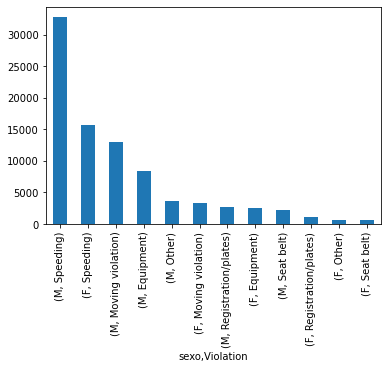

In [23]:
freq_genderpandas.value_counts().plot.bar()

QUESTÃO 2
    (d) Quando um motorista é parado por excesso de velocidade, muitas pessoas acreditam que
    o gênero influencia se o motorista receberá uma multa ou um aviso. Você pode encontrar
    evidências disso no conjunto de dados? Para tentar responder essa pergunta, crie uma
    tabela de contingência considerando as variáveis driver_gender e stop_outcome e
    então vai comparar a porcentagem de paradas resultados de uma "Citation"versus um
    "Warning"(veja o link que descreve as variáveis caso tenha dúvidas de compreensão);

In [24]:
stop = police["stop_outcome"].value_counts(normalize=True)*100

freq_stopv = {"Frequência Absoluta": police["stop_outcome"].value_counts(), 
       "Frequência Relativa %": police["stop_outcome"].value_counts(normalize=True)*100,
            "Frequência Cumulativa": np.cumsum(police["stop_outcome"].value_counts())}
freq_stop = pd.DataFrame(freq_stopv)
freq_stop

,Frequência Absoluta,Frequência Relativa %,Frequência Cumulativa
Citation,77091,89.085467,77091
Warning,5136,5.935102,82227
Arrest Driver,2735,3.160534,84962
No Action,624,0.721087,85586
N/D,607,0.701442,86193
Arrest Passenger,343,0.396367,86536


Em citation nós tivemos 89.08% de parada, ja em warning tivemos 5.9%.

QUESTÃO 2 
    (e) O gênero afeta a escolha de veículos a serem revistados? Para responder essa pergunta,
primeiro, calcule a porcentagem de todas as paradas no DataFrame que resultam em
uma revista de veículo;

In [25]:
man = police.loc[police['driver_gender'] == 'M']
woman = police.loc[police['driver_gender'] == 'F']

stoping= pd.DataFrame({'FA|Masc': man['stop_outcome'].value_counts(),
                         'FA|Fem': woman['stop_outcome'].value_counts()}).rename_axis('parada')

fstop = pd.DataFrame({'FreqM': np.around(man['stop_outcome'].value_counts()/police['stop_outcome'].value_counts().sum()*100,decimals=2),
                         'FreqF': np.around(woman['stop_outcome'].value_counts()/police['stop_outcome'].value_counts().sum()*100,decimals=2)}).rename_axis('stop_outcome')


stoping

,FA|Masc,FA|Fem
parada,,
Arrest Driver,2179,556
Arrest Passenger,230,113
Citation,55840,21251
N/D,439,168
No Action,423,201
Warning,3651,1485


QUESTÃO 2
    (f) Em seguida, filtre o DataFrame por gênero e calcule a taxa de pesquisa para cada grupo
separadamente. Dica: você executará o mesmo cálculo para ambos os gêneros ao mesmo
tempo usando groupby;

<AxesSubplot:xlabel='driver_gender'>

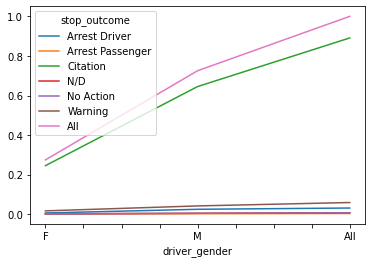

In [26]:
pol = pd.crosstab(police['driver_gender'], police['stop_outcome'], normalize= True, margins= True)
r = pol
r.plot()

QUESTÃO 2 
    (g) Considere agora a hipótese de que a taxa de revista varia de acordo com o tipo de infra-
ção, e a diferença na taxa de revista entre homens e mulheres é porque eles tendem a
cometer infrações diferentes. Calcule a taxa de infração para cada combinação de gênero
e infração. Homens e mulheres são revistados com a mesma taxa para cada infração?

In [27]:
freq_genderpandas['sexo'].value_counts()

M    62762
F    23774
Name: sexo, dtype: int64

QUESTÃO 3 
    (a) Quando um policial para um motorista, uma pequena porcentagem dessas paradas ter-
mina em uma prisão. Isso é conhecido como taxa de prisão. Você descobrirá se a taxa de
prisão varia de acordo com a hora do dia. Primeiro, você calculará a taxa de prisão em
todas as paradas no DataFrame, calculando a média da coluna is_arrested 

In [28]:
police['is_arrested'].value_counts()

False    83458
True      3078
Name: is_arrested, dtype: int64

In [29]:
police.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-0412:55,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-2323:15,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-1704:15,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-2017:15,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-2401:20,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [30]:
police['is_arrested'].mean()

0.0355690117407784

QUESTÃO 3
    (b) Em seguida, você calculará a taxa de prisão por hora usando o atributo de hora do índice.
A hora varia de 0 a 23, considerando que 0 é meia noite e 12h é meio dia. Para isso,
agrupe (usando groupby) pelo atributo de hora do índice do DataFrame, calculando a
média dos valores agrupados. No final crie uma nova variável hourly_arrest_rate
com os valores encontrados da taxa de prisão por hora;

In [ ]:
hourly_arrest_rate = police.groupby(by=lambda x: x.hour)['is_arrested']
hourly_arrest_rate = pd.DataFrame(hourly_arrest_rate.value_counts())
hourly_arrest_rate

In [ ]:
police["hourly_arrest_rate"] = police["stop_date"] + police["stop_time"]

QUESTÃO 3
    (c) Agora crie um gráfico de linha mostrando a variável hourly_arrest_rate, colocando
o rótulo Horas no eixo-x, e Taxa de Prisões, no eixo-y, e o título de Taxa de Prisões por Hora
do Dia;

QUESTÃO 3
    (d) Em uma pequena parte das paradas de trânsito, drogas são encontradas no veículo du-
rante uma busca. Agora, você avaliará se essas interrupções relacionadas à drogas estão
se tornando mais comuns com o tempo. A coluna booleana drug_related_stop indica
se drogas foram encontradas durante uma determinada parada. Você calculará a taxa
anual de drogas reamostrando essa coluna e, em seguida, usará um gráfico de linha para
visualizar como a taxa mudou ao longo do tempo;

<AxesSubplot:>

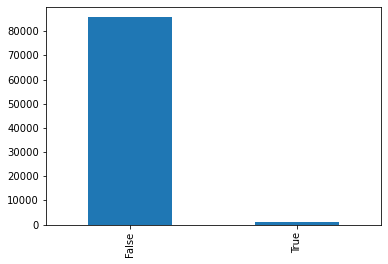

In [32]:
table = police['drugs_related_stop'].value_counts()
table.plot.bar()

QUESTÃO 3
    (e) Ainda falando sobre drogas, consideremos a hipótese de que, o aumento ou a diminui-
ção das apreensões de drogas estão associadas ao aumento ou diminuição das abor-
dagens políciais, ou seja, mais abordagens, geram mais apreensões e menos aborda-
gens, menos apreensões de drogas. Podemos testar essa hipótese calculando a taxa de
abordagens anual e, em seguida, comparando-a com a taxa anual de medicamentos.
Se a hipótese for verdadeira, você verá que ambas as taxas aumentam com o tempo.
Para isso, calcule a taxa de pesquisa anual reamostrando a coluna search_conducted
e salve o resultado como Annual_search_rate. Concatene Annual_drug_rate e
Annual_search_rate ao longo do eixo das colunas e gere gráficos de linha para os
dados desse resultado da concatenação;

In [34]:
Annual_search_rate = police['search_conducted'].mean()
Annual_search_rate


0.0382153092354627

QUESTÃO 3
    (f) O estado de Rhode Island está dividido em seis distritos policiais, também conhecidos
como zonas. Como as zonas se comparam em termos de quais infrações são detectadas
pela polícia? Para isso, crie uma distribuição conjunta entre as variáveis district e
violation, usando uma tabela de contingência. Depois, selecione as linhas das zonas
’Zona K1’ a ’Zona K3’, gere um gráfico de barras agrupadas que ilustre os resultados
obtido na tabela, e responda a questão colocada

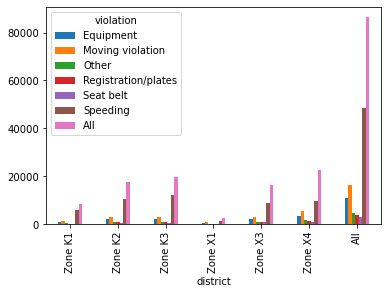

In [ ]:
graph=pd.crosstab(police['district'], police['violation'], margins=True).plot.bar()


QUESTÃO 4 Analisando o efeito do clima no policiamento
Nesta última parte, você usará um segundo conjunto de dados, weather.csv, para explorar
o impacto das condições meteorológicas no comportamento da polícia durante as paradas de
trânsito. Você vai praticar mesclar e remodelar conjuntos de dados, avaliando se uma fonte de
dados é confiável, trabalhando com dados categóricos e outras habilidades avançadas.
(a) Comece explorando as temperaturas apresentadas no conjunto de dados: carregue o con-
junto, selecione as variáveis relativas à temperatura (TMIN, TAVG, TMAX), imprima as
principais medidas resumo usando o comando describe e plote os três boxplots dessas
variáveis em um mesmo gráfico. O que você poderia comentar sobre as temperaturas, com
base nos resultados obtidos? PS.: ao decidir se os valores parecem razoáveis, lembre-se
de que a temperatura é medida em graus Fahrenheit, não Celsius!

In [36]:
we = pd.read_csv('weather.csv')
we

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,USW00014765,2015-12-27,51.0,44,61,9.17,28.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4013,USW00014765,2015-12-28,40.0,30,44,12.30,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4014,USW00014765,2015-12-29,33.0,28,40,12.53,18.1,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4015,USW00014765,2015-12-30,30.0,27,35,6.93,15.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
we.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  4017 non-null   object 
 1   DATE     4017 non-null   object 
 2   TAVG     1217 non-null   float64
 3   TMIN     4017 non-null   int64  
 4   TMAX     4017 non-null   int64  
 5   AWND     4017 non-null   float64
 6   WSF2     4017 non-null   float64
 7   WT01     1767 non-null   float64
 8   WT02     221 non-null    float64
 9   WT03     224 non-null    float64
 10  WT04     117 non-null    float64
 11  WT05     360 non-null    float64
 12  WT06     25 non-null     float64
 13  WT07     79 non-null     float64
 14  WT08     404 non-null    float64
 15  WT09     69 non-null     float64
 16  WT10     2 non-null      float64
 17  WT11     1 non-null      float64
 18  WT13     1175 non-null   float64
 19  WT14     575 non-null    float64
 20  WT15     6 non-null      float64
 21  WT16     1326 

In [47]:
temperatura = {"Mínima": we["TMIN"].describe(), 
       "Máxima": we["TMAX"].describe(),
            "Média":we["TAVG"].describe()}
tnew = pd.DataFrame(temperatura)
tnew

,Mínima,Máxima,Média
count,4017.000000,4017.000000,1217.000000
mean,43.484441,61.268608,52.493016
std,17.020298,18.199517,17.830714
min,-5.000000,15.000000,6.000000
25%,30.000000,47.000000,39.000000
50%,44.000000,62.000000,54.000000
75%,58.000000,77.000000,68.000000
max,77.000000,102.000000,86.000000


<AxesSubplot:>

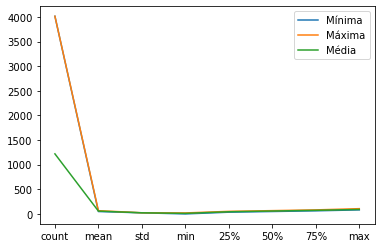

In [49]:
tnew.plot()

Temos a temperatura máxima, mínima e a média entre elas. A diferença entre elas é bem pequena.                                       

QUESTÃO 4
    (b) Para a variável TDIFF, que representa a diferença entre as temperaturas, apresente as
medidas resumo e plote um histograma para essa variável. O que pode dizer sobre a
distribuição de dados?

In [53]:
#A variável TDIFF não foi encontrada no conjunto de dados, então iremos fazer na mão!
#TDIFF = TMAX - TMIN
we['TDIFF'] = we['TMAX'] - we ['TMIN']

print(we['TDIFF'])

0       18
1       16
2        9
3        6
4       15
        ..
4012    17
4013    14
4014    12
4015     8
4016    15
Name: TDIFF, Length: 4017, dtype: int64


<AxesSubplot:ylabel='Frequency'>

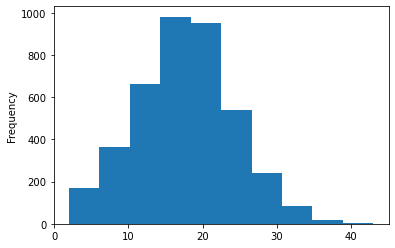

In [54]:
#criando o histograma da nossa variável representando a diferença entre as temperaturas máximas e mínimas.
we['TDIFF'].plot.hist()

QUESTÃO 4
    (c) Você agora preparará os DataFrames das abordagens de trânsito e de classificação do
clima (o dessa sessão) para que estejam prontos para serem mesclados. No DataFrame
sobre abordagens no trânsito, você transformará o índice stop_datetime para uma co-
luna (reset_index), pois o índice será perdido durante a mesclagem. Com o DataFrame
meteorológico, selecione as colunas DATE e rating e coloque em um novo dataframe;

In [55]:
police.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-0412:55,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-2323:15,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-1704:15,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-2017:15,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-2401:20,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [57]:
policew = police.rename_axis('stop_datetime').reset_index()

In [61]:
daterate = {"data": we["DATE"]}
dr = pd.DataFrame(daterate)
dr

,data
0,2005-01-01
1,2005-01-02
2,2005-01-03
3,2005-01-04
4,2005-01-05
...,...
4012,2015-12-27
4013,2015-12-28
4014,2015-12-29
4015,2015-12-30


QUESTÃO 4
    (d) Agora, mescle os dataframes gerados em um novo dataframe, unidos usando a coluna
stop_date de do dataframe policial e a coluna DATE do novo dataframe gerado a partir
dos dados meteorológicos. Assim que a mesclagem for concluída, defina stop_datetime
novamente como o índice;

In [63]:
policiadf = {"Polícia": police["stop_date"]}

policeDF = pd.DataFrame(policiadf)
policeDF

,Polícia
stop_datetime,
2005-01-0412:55,2005-01-04
2005-01-2323:15,2005-01-23
2005-02-1704:15,2005-02-17
2005-02-2017:15,2005-02-20
2005-02-2401:20,2005-02-24
...,...
2015-12-3121:21,2015-12-31
2015-12-3121:59,2015-12-31
2015-12-3122:04,2015-12-31


In [64]:
pd.concat([dr, policeDF], axis=0, ignore_index=True)

,data,Polícia
0,2005-01-01,NaN
1,2005-01-02,NaN
2,2005-01-03,NaN
3,2005-01-04,NaN
4,2005-01-05,NaN
...,...,...
90548,NaN,2015-12-31
90549,NaN,2015-12-31
90550,NaN,2015-12-31
90551,NaN,2015-12-31
